# 探索时间序列

数据来源：[google stocks](https://www.kaggle.com/ratnesh88/explore-google-stocks)

时间序列分析是计量经济学的重要组成部分，这里我们以ARIMA模型为例子，带领大家一起探索数据的特征。

首先依然是引入包，然后查看数据是否正常。

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from statsmodels.tsa.arima_model import ARIMA
import os
import warnings
warnings.filterwarnings('ignore')

print(os.listdir('data'))
data = pd.read_csv("data/Google.csv",sep=",",parse_dates=['Date'],index_col='Date')
data.head(2)

['10years.csv', 'all_banks', 'FamaFrench.csv', 'gm-ws-b.us.txt', 'gmre.us.txt', 'gmre_a.us.txt', 'gms.us.txt', 'gmta.us.txt', 'gmz.us.txt', 'gnbc.us.txt', 'gnc.us.txt', 'gnca.us.txt', 'gncma.us.txt', 'gne.us.txt', 'gne_a.us.txt', 'gnk.us.txt', 'gnl.us.txt', 'gnl_a.us.txt', 'gnmk.us.txt', 'gnmx.us.txt', 'gnrc.us.txt', 'gnrt.us.txt', 'gnrx.us.txt', 'gnst.us.txt', 'gnt.us.txt', 'gntx.us.txt', 'gnty.us.txt', 'gnt_a.us.txt', 'gnus.us.txt', 'gnw.us.txt', 'goau.us.txt', 'goex.us.txt', 'gof.us.txt', 'gogl.us.txt', 'gogo.us.txt', 'gol.us.txt', 'gold.us.txt', 'golf.us.txt', 'good.us.txt', 'goodm.us.txt', 'goodo.us.txt', 'goodp.us.txt', 'goog.us.txt', 'Google.csv', 'shampoo-sales.csv', 'stocks.xlsx', '上证指数201301.csv', '上证指数201401.csv']


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0


### 1. 探索数据分布

数据本身就具有很多特性，我们可以用dataframe自带的很多方法来从各个角度查看数据的特征。

In [4]:
# info：查看列类型和记录数、数据框大小
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3125 entries, 2004-08-19 to 2017-01-17
Data columns (total 12 columns):
Open           3125 non-null float64
High           3125 non-null float64
Low            3125 non-null float64
Close          3125 non-null float64
Volume         3125 non-null float64
Ex-Dividend    3125 non-null float64
Split Ratio    3125 non-null float64
Adj. Open      3125 non-null float64
Adj. High      3125 non-null float64
Adj. Low       3125 non-null float64
Adj. Close     3125 non-null float64
Adj. Volume    3125 non-null float64
dtypes: float64(12)
memory usage: 317.4 KB


In [5]:
# index：查看行索引
data.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17'],
              dtype='datetime64[ns]', name='Date', length=3125, freq=None)

In [6]:
# loc：查看满足条件的记录，取到特定位置的数据
print(data.loc[data['High']==1228.880000])
print('---')
print(data.loc['2014-02-24', ['Volume', 'Adj. Volume']])

              Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                    
2014-02-26  1224.0  1228.88  1213.76  1220.17  3960400.0          0.0   

            Split Ratio   Adj. Open   Adj. High    Adj. Low  Adj. Close  \
Date                                                                      
2014-02-26          1.0  613.895035  616.342591  608.759181  611.974105   

            Adj. Volume  
Date                     
2014-02-26    3960400.0  
---
Volume         3345200.0
Adj. Volume    3345200.0
Name: 2014-02-24 00:00:00, dtype: float64


In [7]:
# describe: 查看每列的统计值，均值、均差和分位数等

data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03,3125.000000,3125.0,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03
mean,560.171567,565.480031,554.309518,559.907342,8.404691e+06,0.181751,1.0,354.861790,358.112859,351.231911,354.691981,8.404691e+06
std,200.944961,201.563829,199.979903,200.813213,8.399679e+06,10.160186,0.0,195.252794,196.367956,193.820339,195.144724,8.399679e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,445.250000,450.720000,438.560500,444.080000,3.209500e+06,0.000000,1.0,223.314350,226.057819,219.959243,222.727539,3.209500e+06
50%,548.490000,553.520000,543.670000,548.650000,5.620700e+06,0.000000,1.0,288.992091,291.399522,286.760201,289.578902,5.620700e+06
75%,667.490000,673.027500,659.240000,667.120000,1.107890e+07,0.000000,1.0,517.492450,520.810000,513.108918,517.372078,1.107890e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,838.500000,839.000000,829.520000,835.740000,8.215110e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221076AA390>,
      dtype=object)

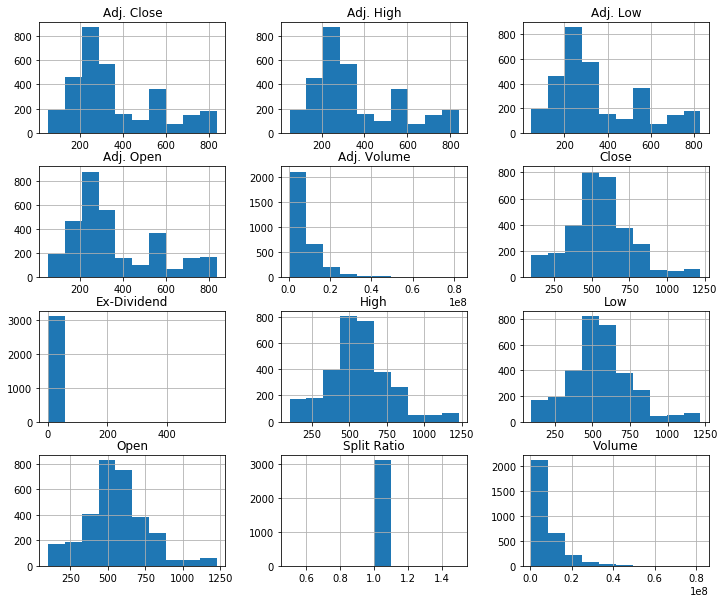

In [8]:
# hist:通过直方图，查看每列的数据分布，参数figsize设置图像的大小
data.hist(figsize=(12,10))

In [9]:
# corr: 变量之间的相关性
data.corr()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Open,1.000000,0.999705,0.999566,0.999277,-0.526805,0.001177,NaN,0.733222,0.732091,0.733943,0.732733,-0.526805
High,0.999705,1.000000,0.999514,0.999629,-0.523185,0.002026,NaN,0.732420,0.731656,0.733296,0.732334,-0.523185
Low,0.999566,0.999514,1.000000,0.999700,-0.533264,0.001047,NaN,0.733275,0.732299,0.734538,0.733324,-0.533264
Close,0.999277,0.999629,0.999700,1.000000,-0.528669,0.001033,NaN,0.732773,0.732046,0.734033,0.733190,-0.528669
Volume,-0.526805,-0.523185,-0.533264,-0.528669,1.000000,-0.009345,NaN,-0.558889,-0.556840,-0.562534,-0.559904,1.000000
Ex-Dividend,0.001177,0.002026,0.001047,0.001033,-0.009345,1.000000,NaN,0.020027,0.020976,0.019829,0.019881,-0.009345
Split Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj. Open,0.733222,0.732420,0.733275,0.732773,-0.558889,0.020027,NaN,1.000000,0.999871,0.999809,0.999684,-0.558889
Adj. High,0.732091,0.731656,0.732299,0.732046,-0.556840,0.020976,NaN,0.999871,1.000000,0.999788,0.999835,-0.556840
Adj. Low,0.733943,0.733296,0.734538,0.734033,-0.562534,0.019829,NaN,0.999809,0.999788,1.000000,0.999871,-0.562534


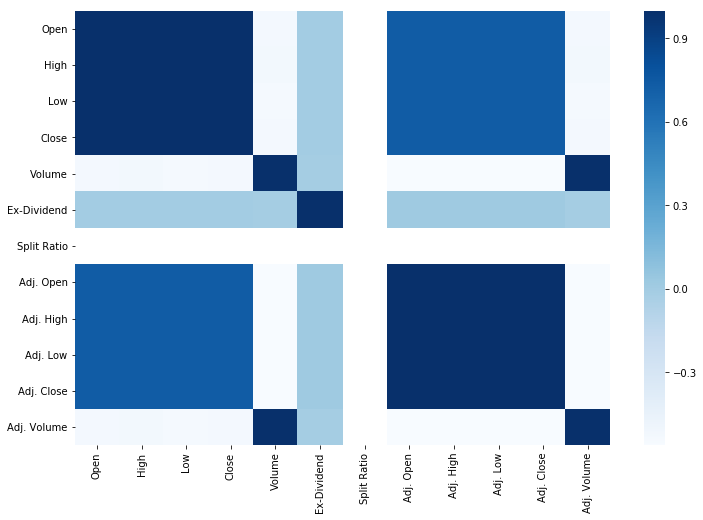

In [10]:
# heatmap(data,fmt,ax) :seaborn可视化包中的热力图，参数data是矩阵数据集，fmt和ax是图像的格式设置    
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), fmt="f",ax=ax ,cmap = "Blues" )

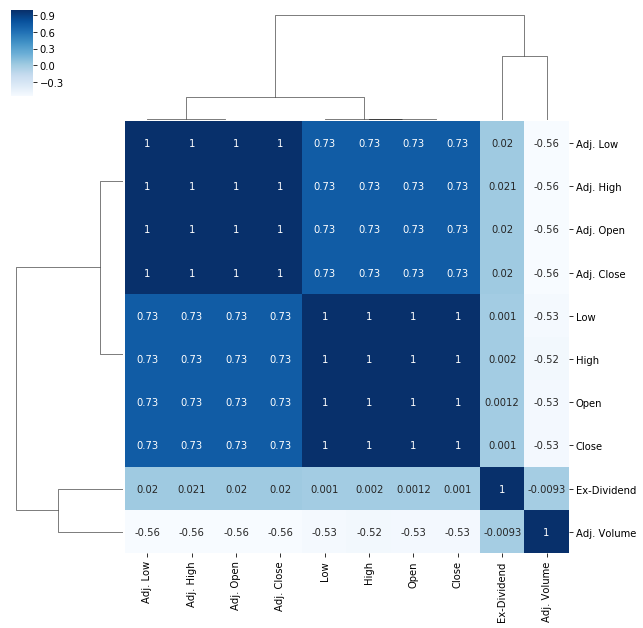

In [11]:
# clustermap: 相关系数聚类
data1 = data.drop(columns = ["Volume","Split Ratio"])  #这两列会导致无穷值，聚类时报错
sns.clustermap(data1.corr(),annot=True,cmap='Blues')  

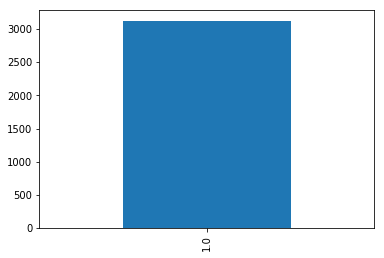

In [12]:
# plot("bar") :绘制柱形图 
data['Ex-Dividend'].value_counts().plot("bar")
data['Split Ratio'].value_counts().plot("bar")
datax= data.drop(['Split Ratio','Ex-Dividend'],axis=1)

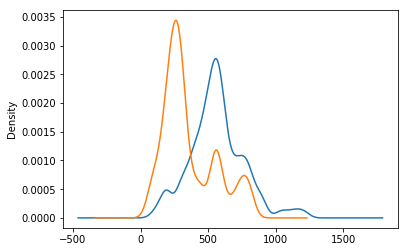

In [13]:
# - plot("kde") :绘制核密度图 kdeplot 
data['High'].plot("kde")
data['Adj. High'].plot("kde")

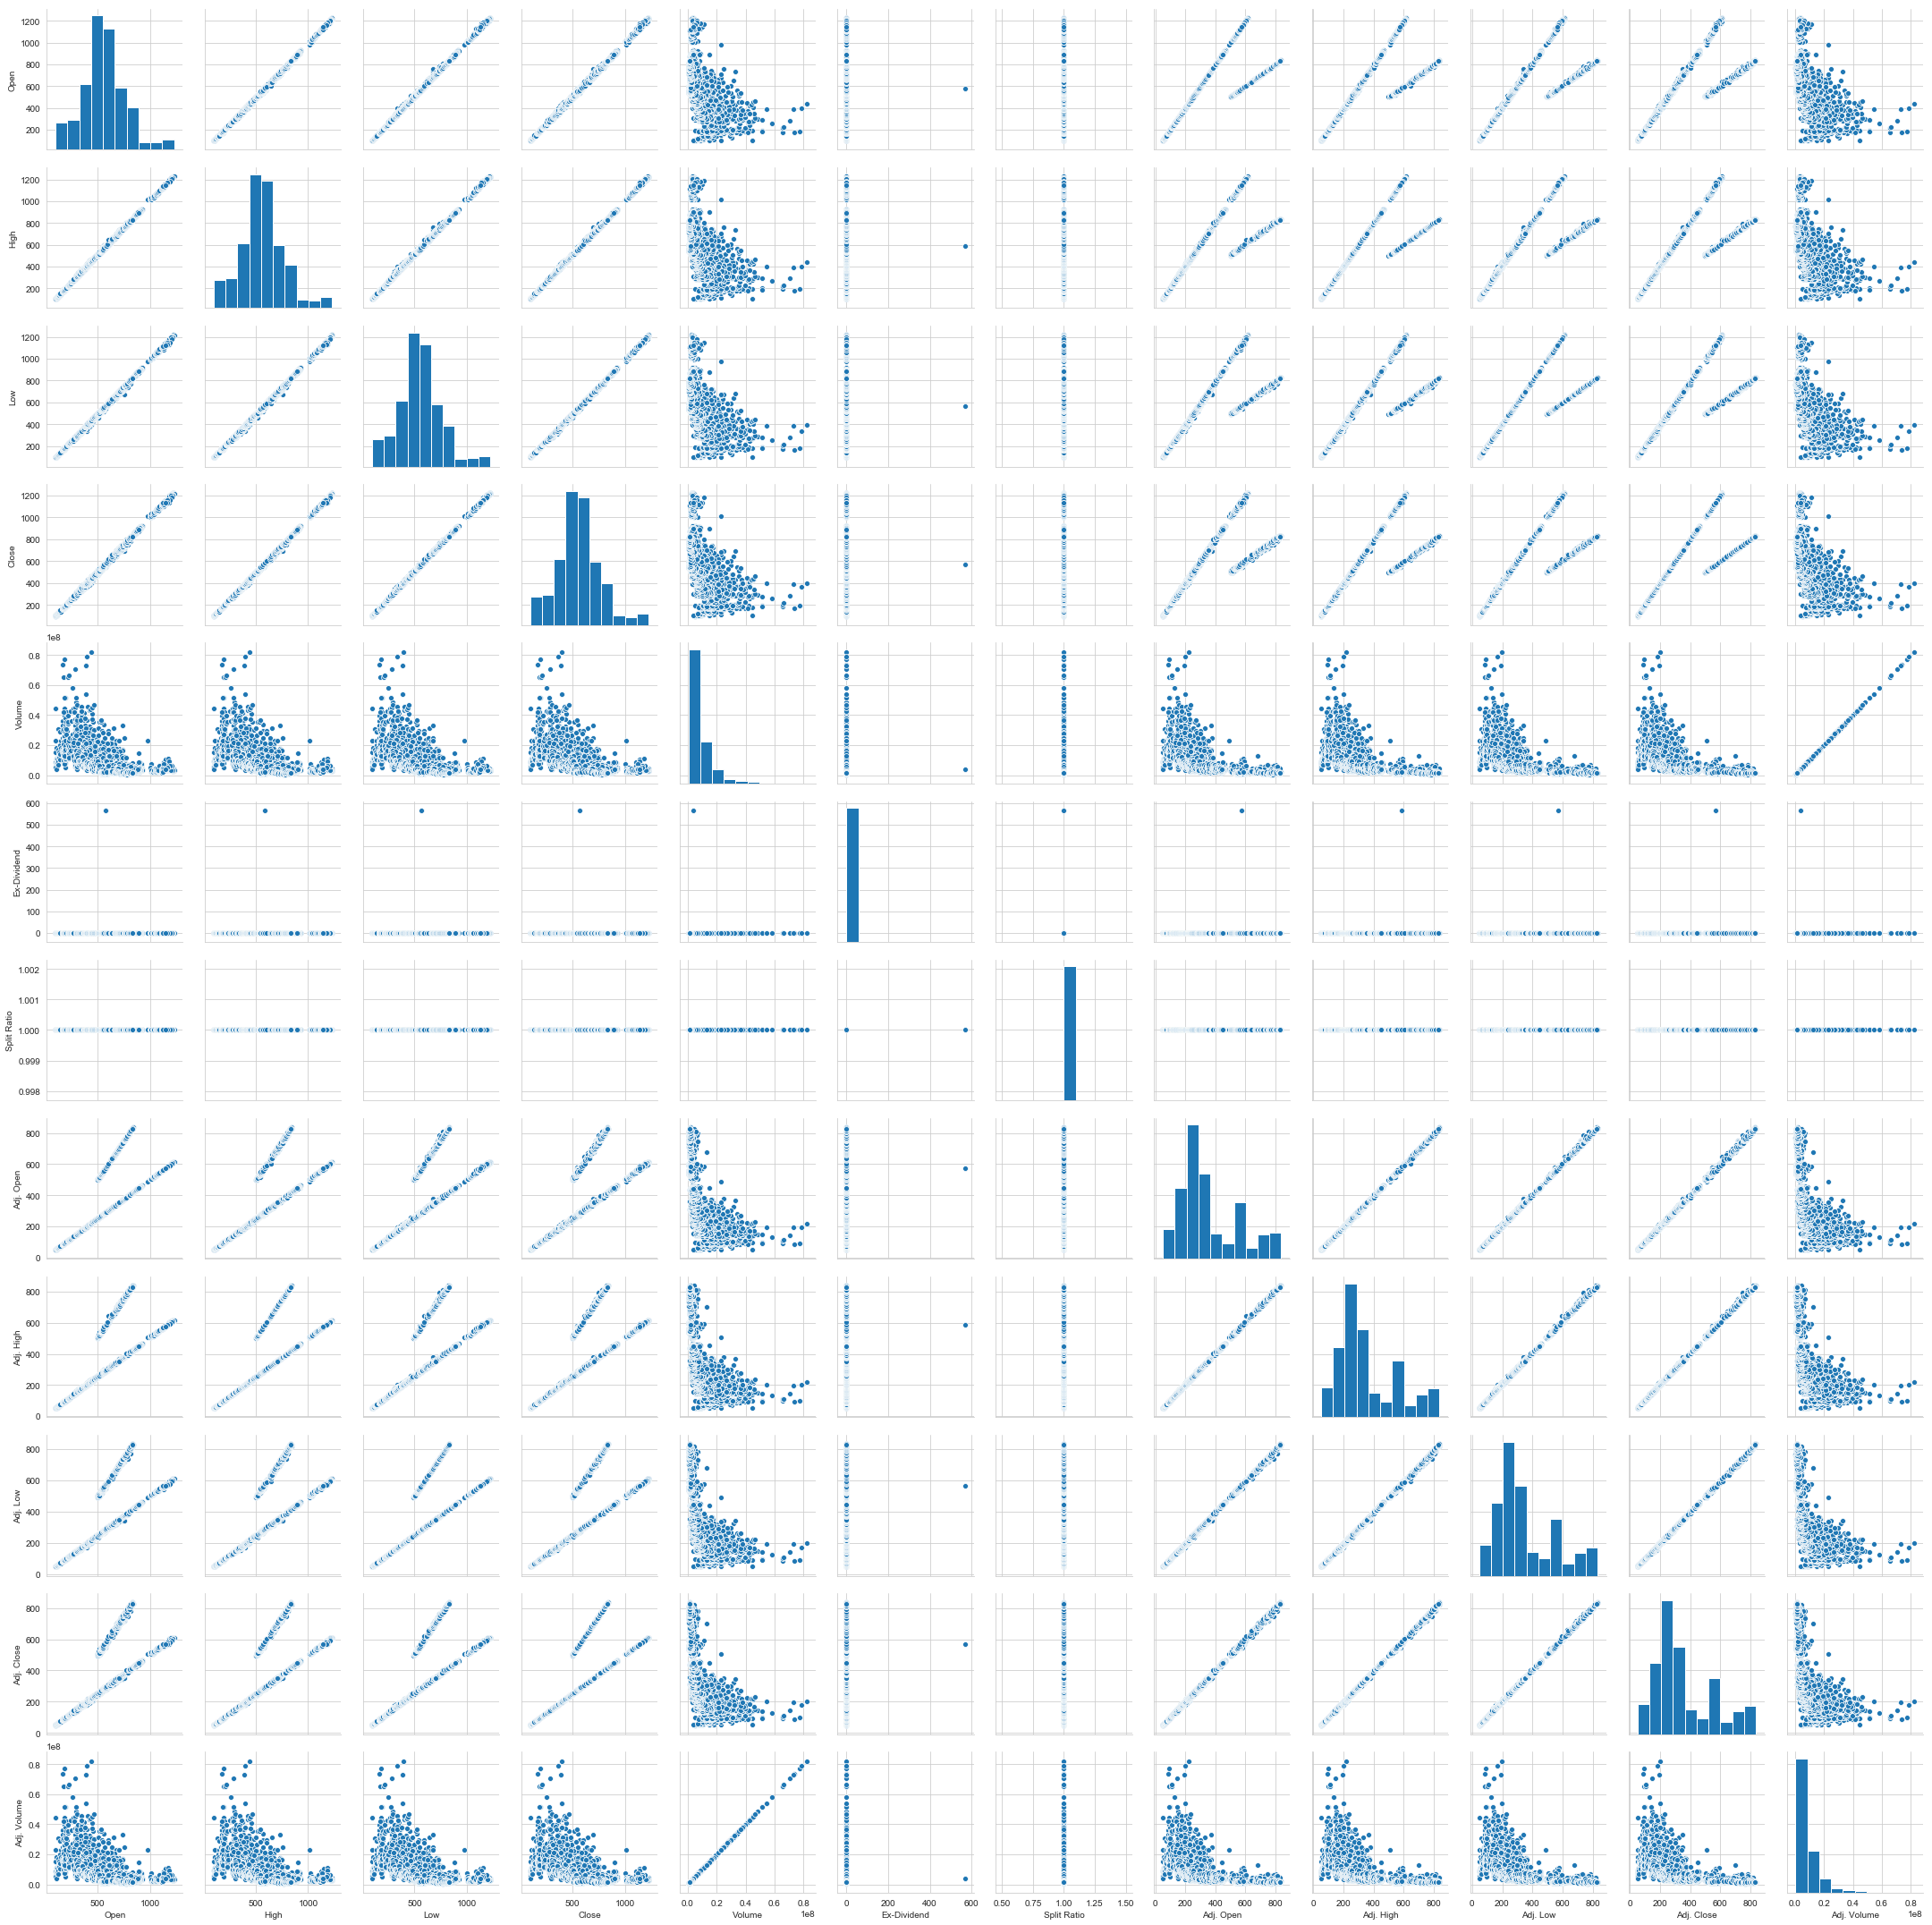

In [14]:
# 同时查看直方图和相关散点图
import seaborn as sns  
sns.set_style('whitegrid')
sns.pairplot(data)

pandas是优秀的数据分析基础包，内容丰富，如果不清楚怎么调用函数，我们可以到网上取查找别人是怎么办的，熟练过后，更是可以直接查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/index.html)，非常方便

## 2.探索时间关系
### 2.1 plot :可视化时间序列，设置标题，横纵坐标

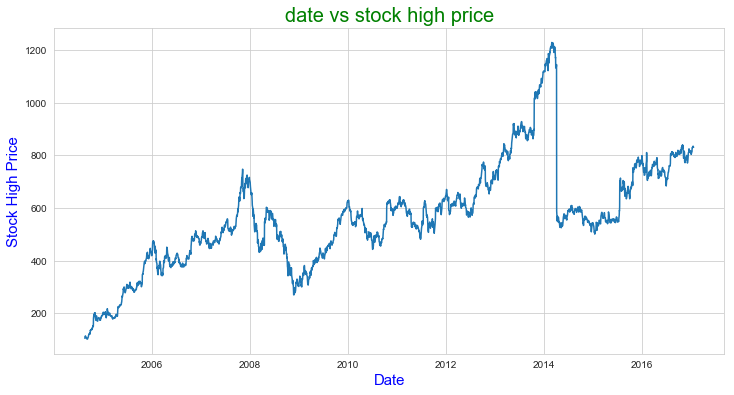

In [15]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['High'])
plt.title("date vs stock high price",fontsize=20,color='g')
plt.xlabel("Date",fontsize=15,color='b')
plt.ylabel("Stock High Price",fontsize=15,color='b')
plt.show()

### 2.2 查看滑动平均和均差图

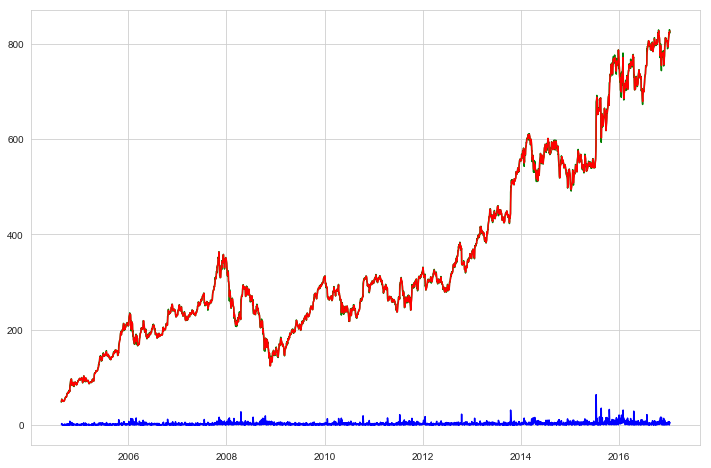

In [16]:
plt.figure(figsize=(12,8))

#gopen = data['Adj. Open']
#ghigh = data['Adj. High']
glow = data['Adj. Low']
#plt.plot(gopen)
#plt.plot(ghigh,color='r')
plt.plot(glow,color='g')
plt.plot(glow.rolling(window=2).mean(),color='r')
plt.plot(glow.rolling(window=2).std(),color = 'blue')

### 2.3 滞后散点图

时间序列建模假定一个观测值与前面的观测值之间存在一定的关系。

在时间序列中的（相对于某观察值）前面的观测值被称为滞后值，在一个时间步长前的观测值称为滞后一期，在两个时间步长前的观测值为滞后二期，依此类推。

对探索每个观察值之间和其滞后值的关系极为有用的一个类型称为散点图。

Pandas 就正好有一个称为滞后图的内置函数。它绘制的x轴是t时刻的观测值和而y轴的是 (t-1) 时刻的观察值（滞后一期）（此处表述与下图有异，译者注）。

如果这些点沿着从图的左下角到右上角的对角线聚集，则表示正相关。
如果这些点沿着从左上角到右下角的对角线聚集，则表示负相关。
以上任一关系都是好的，因为它们都可以被建模。
离对角线越紧密，表明关系越强，而从对角线上散开得越广表明关系越弱。

中间一个球状或分散在整个图中表明了一个微弱的关系或者不相关。
通过运行示例代码生成的图显示了观察值与其滞后值之间的相对较弱的正相关性。

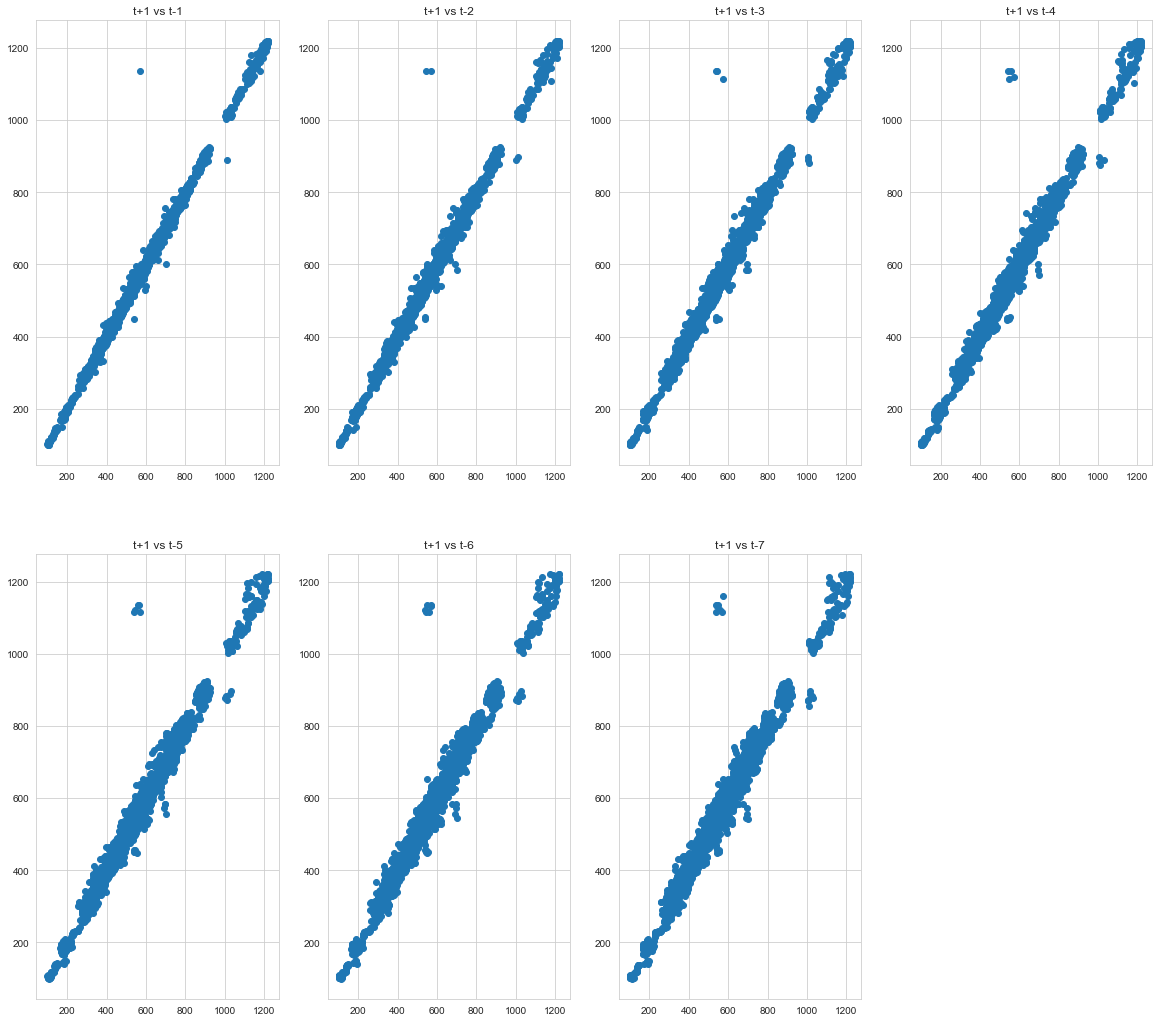

In [19]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import pylab
from pandas.plotting import scatter_matrix
lags = 7
values = DataFrame(data["Close"].values)
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pylab.rcParams['figure.figsize'] = (20.0, 18.0) # 设置图像大小
pyplot.show()

### 2.4 相关图
我们可以量化观测值与其滞后值关系的强度和类型。在统计学中，这被称为相关性，并且在时间序列中对滞后值进行计算时，被称为自相关性。  
可以为每个观测值和不同的滞后值计算相关值，称为相关系数。计算出来结果后，就可以创建一个帮助更好地理解这种关系对不同滞后值是如何变化的图。得到的图显示x轴为滞后期数和y轴为相关值。提供的虚线，表明在这些线以上的任何相关值在统计上是显著的（有意义的）。

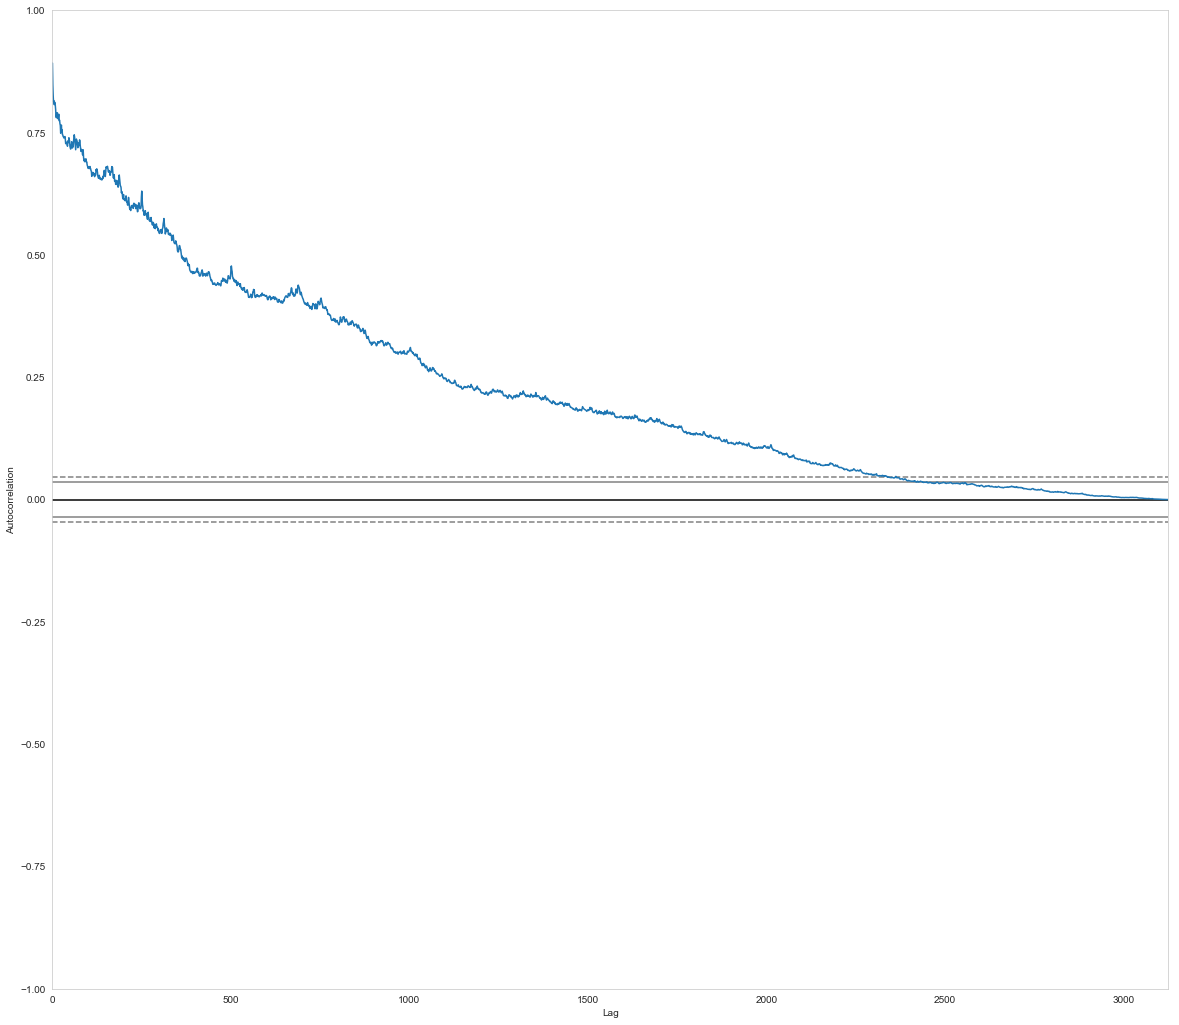

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
pyplot.show()

在statsmodels中也提供了自相关和偏相关图

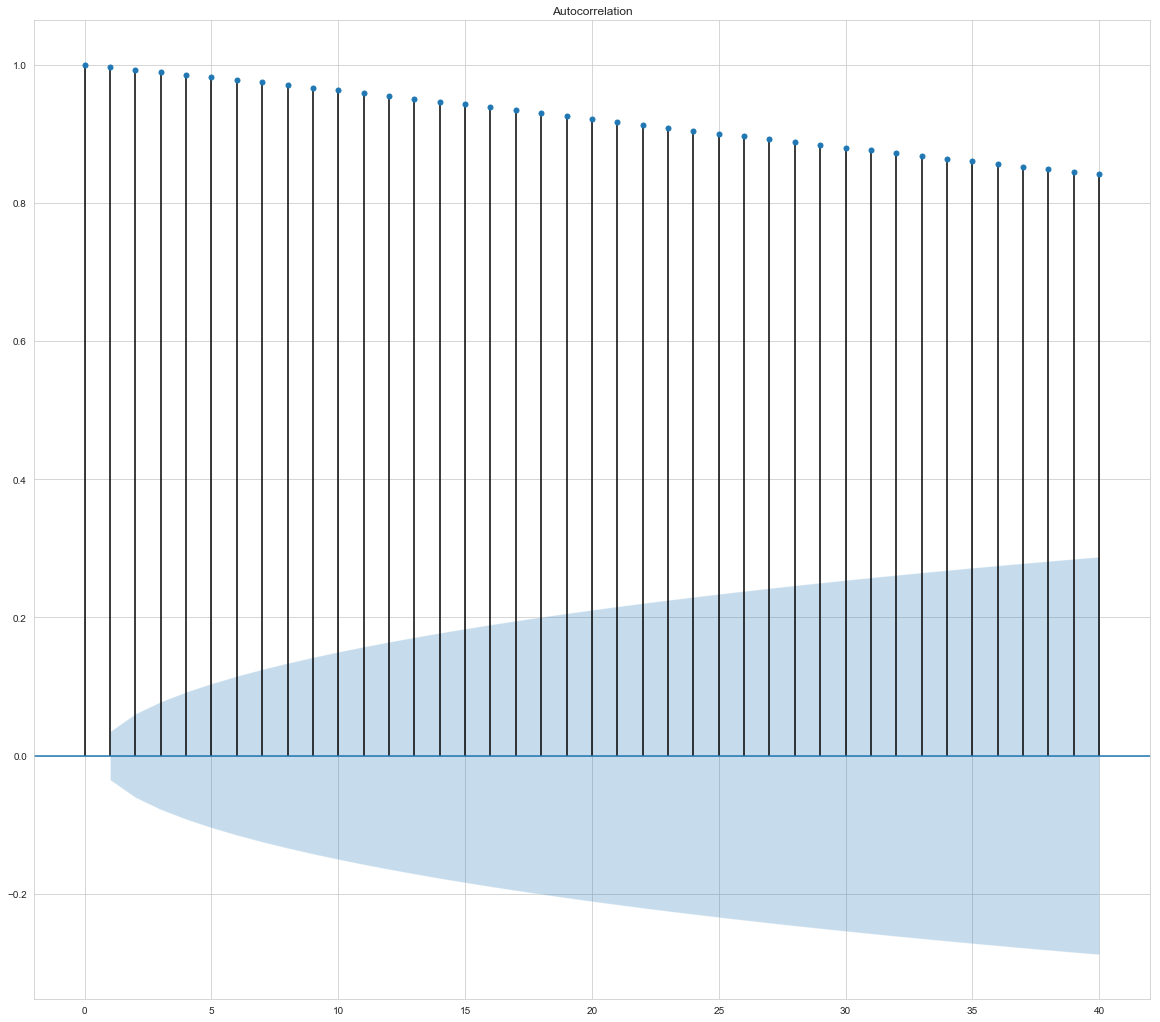

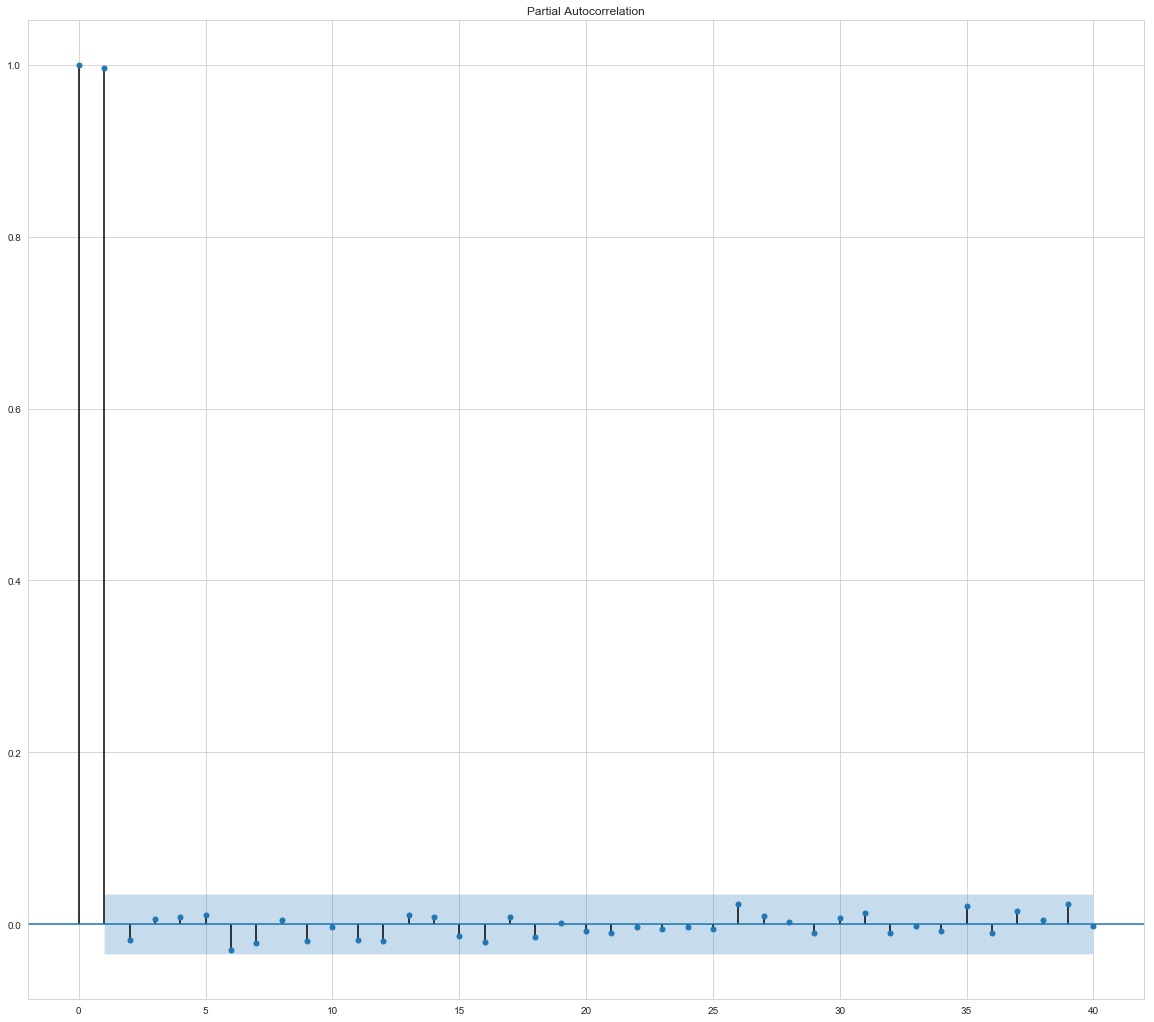

In [22]:
import statsmodels.api as sm
#自相关 ACF
plt = sm.graphics.tsa.plot_acf(data['Close'], lags=40)
#偏相关 PACF
plt = sm.graphics.tsa.plot_pacf(data['Close'], lags=40)

In [29]:
model = ARIMA(data['Adj. Low'], order=(5,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Adj. Low   No. Observations:                 3124
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10009.078
Method:                       css-mle   S.D. of innovations              5.960
Date:                Tue, 02 Apr 2019   AIC                          20032.156
Time:                        15:41:22   BIC                          20074.484
Sample:                             1   HQIC                         20047.350
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2478      0.109      2.278      0.023       0.035       0.461
ar.L1.D.Adj. Low     0.1122      0.018      6.276      0.000       0.077       0.147
ar.L2.D.Adj. Low    -0.0252      0.018     -1.397      0.162      -0.060       0.010
ar.L3.D.Adj. Low    -0.0163      0.018     -0.905      0.365      -0.052       0.019
ar.L4.D.Adj. Low    -0.0186      0.018     -1.032      0.302      -0.054       0.017
ar.L5.D.Adj. Low    -0.0324      0.018     -1.812      0.070      -0.067       0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4271           -1.1307j            1.8207           -0.1066
AR.2            1.4271           +1.1307j            1.8207            0.1066
AR.3           -2.1867           -0.0000j            2.1867           -0.5000
AR.4           -0.6204           -1.9679j            2.0634           -0.2986
AR.5           -0.6204           +1.9679j            2.0634            0.2986
-----------------------------------------------------------------------------
"""

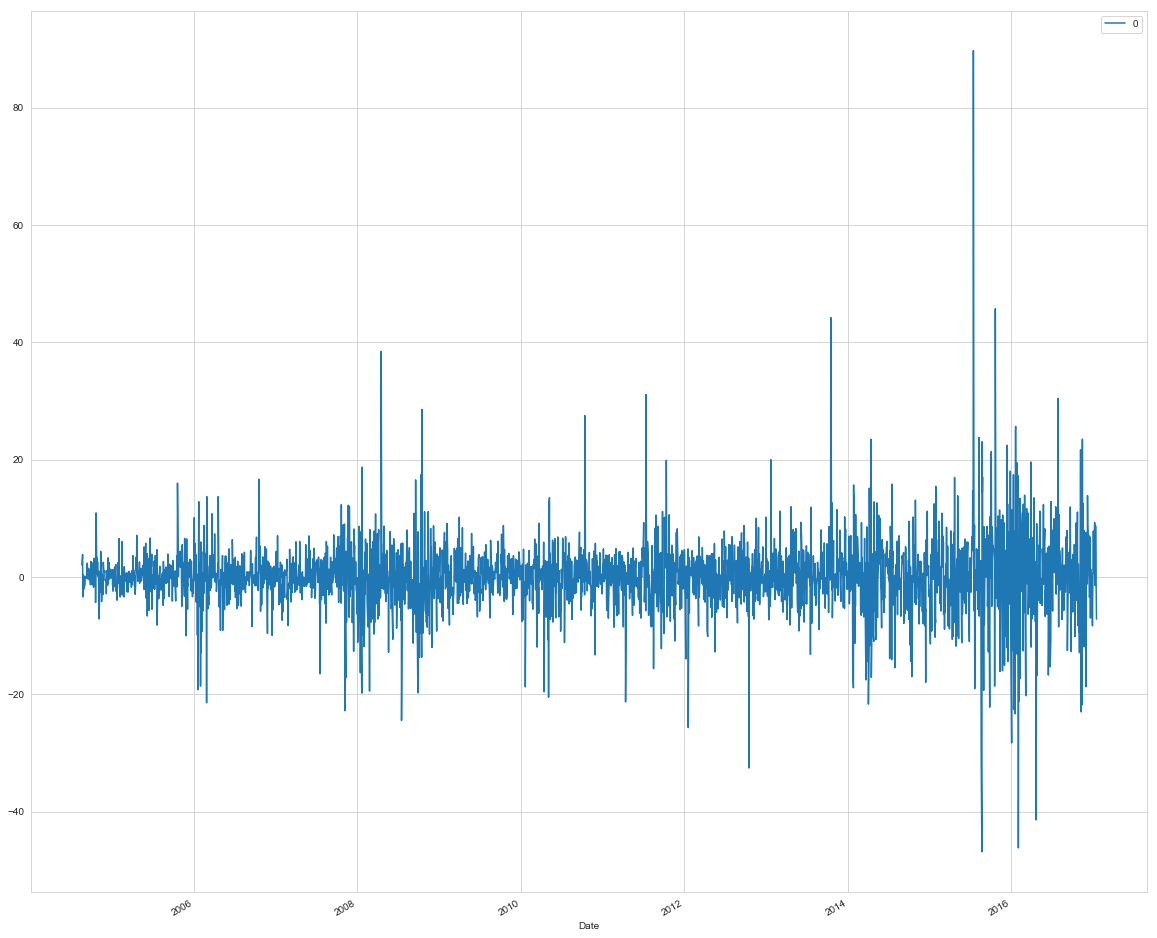

In [24]:
resd = pd.DataFrame(model_fit.resid)
resd.plot()

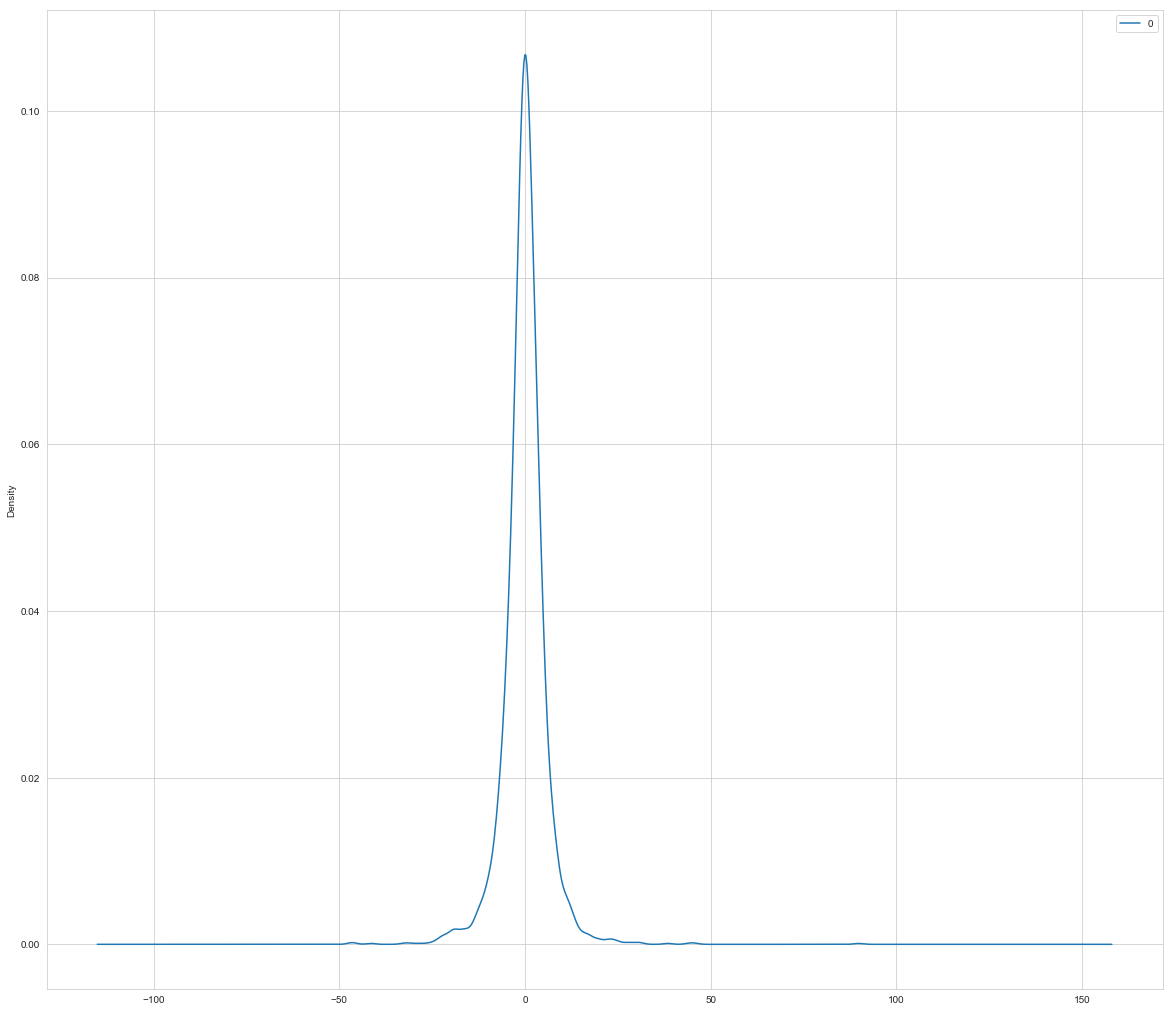

In [25]:
resd.plot(kind='kde')

In [28]:
X = data['Adj. High'].astype('float')
size = int(len(X)*0.66)

train,test = X[0:size],X[size:len(glow)]
print(len(train))
print(len(test))
for t in range(5):
    model = ARIMA(train,order=(5,1,0))
    fit = model.fit(disp=0)
    preds = fit.forecast()
    print("Predicted",preds[0],", Expected",test[t],"Month",test.index[t].date())

2062
1063
Predicted [345.14358625] , Expected 344.56363493229765 Month 2012-10-24
Predicted [345.14358625] , Expected 342.05589377558516 Month 2012-10-25
Predicted [345.14358625] , Expected 342.57248845386795 Month 2012-10-26
Predicted [345.14358625] , Expected 341.5543455442426 Month 2012-10-31
Predicted [345.14358625] , Expected 346.5196730345334 Month 2012-11-01
